In [1]:
from functools import reduce

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 999)

%matplotlib notebook

In [289]:
train = pd.read_csv('../data/train.csv', index_col='PetID')

In [290]:
def combine_multiples(categories):
    categories = list(set([c for c in categories if c != 0]))
    return reduce(lambda a, b: str(a) + '_' + str(b), sorted(categories))

In [294]:
def preprocess(data):
    # make a copy so that the original data is not affected
    data = data.copy()
    # drop uninformative features
    data = data.drop(['Name', 'RescuerID', 'Description'], axis=1)
    # fix features that are spread over multiple columns
    data['Breed'] = data[['Breed1', 'Breed2']].apply(combine_multiples, axis=1)
    data['Color'] = data[['Color1', 'Color2', 'Color3']].apply(combine_multiples, axis=1)
    data = data.drop(['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3'], axis=1)
    # transform columns to categorical type
    category_cols = ['Type', 'Gender', 'MaturitySize', 'FurLength', 
                     'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 
                     'State', 'Color', 'Breed']
    data[category_cols] = data[category_cols].astype('category')
    # PhotoAmt should be int
    data['PhotoAmt'] = data['PhotoAmt'].astype(int)
    
    # not doing anything with breed and color for now - come back to this
    data = data.drop(['Breed', 'Color'], axis=1)
    
    # perform one-hot encoding
    cat_cols = data.select_dtypes('category').columns.drop('State')
    ct = ColumnTransformer(
        [('onehot', OneHotEncoder(categories='auto'), cat_cols)],
        sparse_threshold=0,
        remainder='passthrough'
    )
    data = pd.DataFrame(ct.fit_transform(data), 
                        columns=np.append(ct.transformers_[0][1].get_feature_names(input_features=cat_cols), 
                                          data.columns.drop(cat_cols)),
                        index=data.index)
    
    return data

In [295]:
train_X = train.drop('AdoptionSpeed', axis=1)
train_y = train['AdoptionSpeed']

In [296]:
train_X = preprocess(train_X)

In [77]:
train['Breed'] = train[['Breed1', 'Breed2']].apply(combine_multiples, axis=1)

In [78]:
train['Color'] = train[['Color1', 'Color2', 'Color3']].apply(combine_multiples, axis=1)

In [79]:
train = train.drop(['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3'], axis=1)

In [171]:
category_cols = ['Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 
                 'Dewormed', 'Sterilized', 'Health', 'State', 'Color', 'Breed', 'AdoptionSpeed']

In [172]:
train[category_cols] = train[category_cols].astype('category')

In [174]:
train['PhotoAmt'] = train['PhotoAmt'].astype(int)

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 86e1089a3 to a83d95ead
Data columns (total 17 columns):
Type             14993 non-null category
Age              14993 non-null int64
Gender           14993 non-null category
MaturitySize     14993 non-null category
FurLength        14993 non-null category
Vaccinated       14993 non-null category
Dewormed         14993 non-null category
Sterilized       14993 non-null category
Health           14993 non-null category
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null category
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null int64
AdoptionSpeed    14993 non-null category
Breed            14993 non-null category
Color            14993 non-null category
dtypes: category(12), int64(5)
memory usage: 1.5+ MB


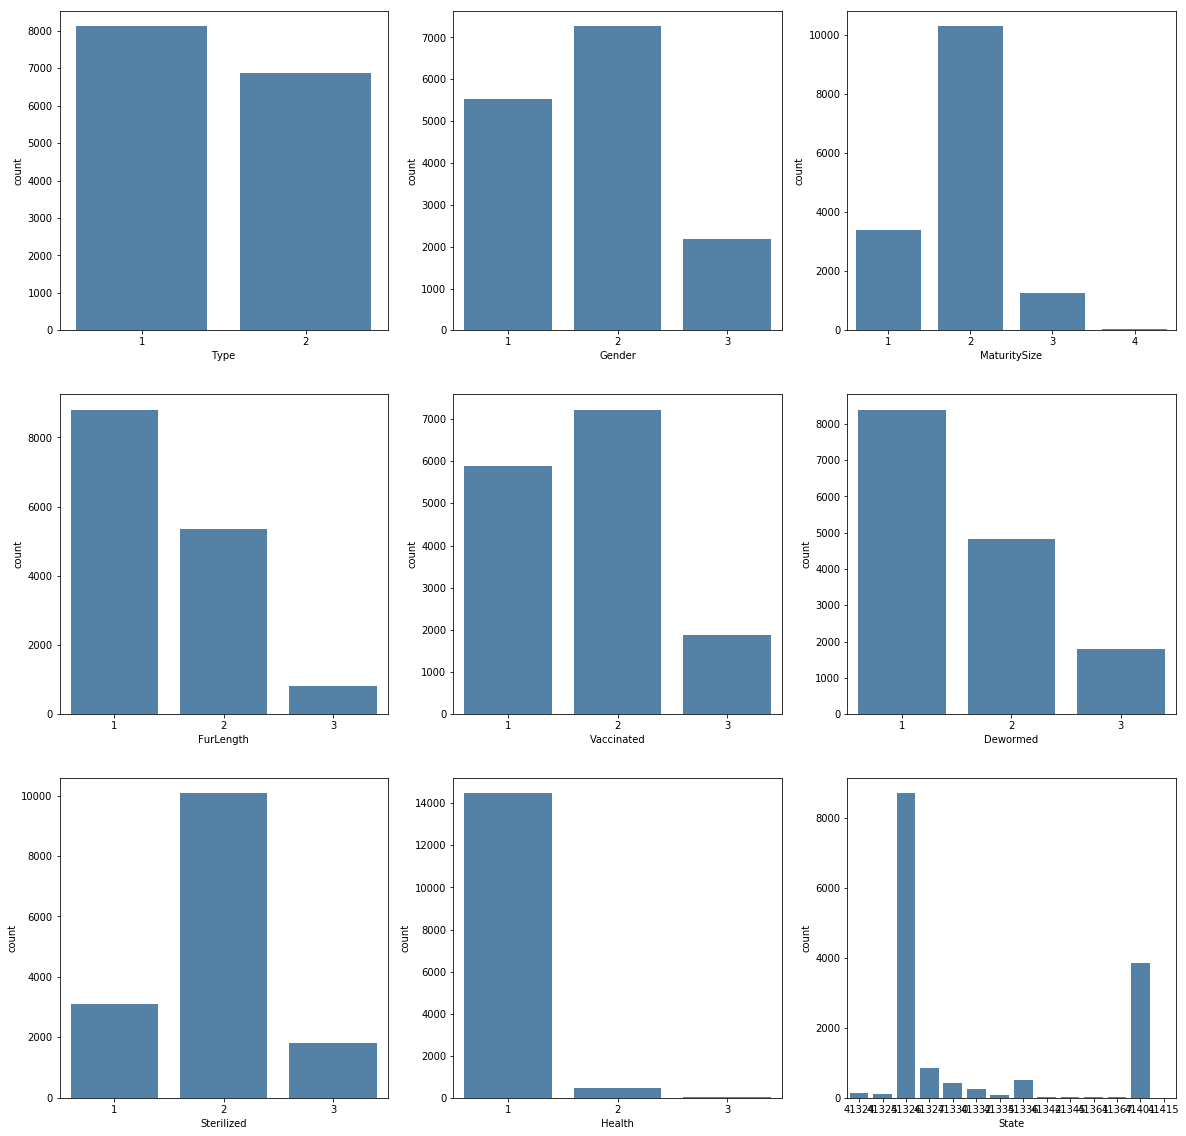

In [176]:
cat_cols = train.select_dtypes('category').columns.drop(['Breed', 'Color', 'AdoptionSpeed'])
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i, col in enumerate(cat_cols):
    r = i // 3
    c = i % 3
    sns.countplot(train[col], ax=ax[r,c], color='steelblue')

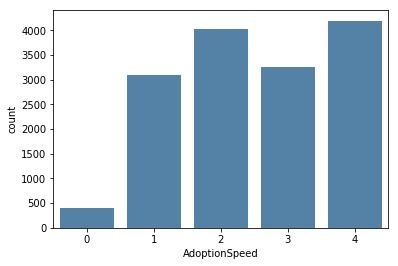

In [88]:
sns.countplot(train['AdoptionSpeed'], color='steelblue')

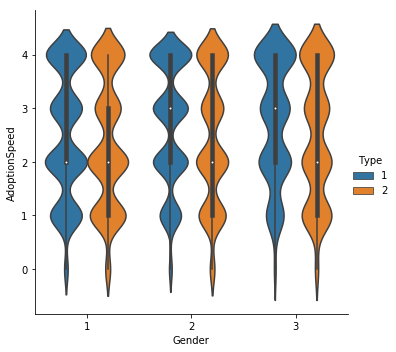

In [89]:
sns.catplot(x='Gender', y='AdoptionSpeed', hue='Type', data=train, kind='violin')

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher

In [130]:
ct = ColumnTransformer(
    [('onehot', OneHotEncoder(categories='auto'), cat_cols)],
    sparse_threshold=0,
    remainder='passthrough'
)

In [131]:
cat_cols

Index(['Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'State'],
      dtype='object')

In [133]:
ct.fit_transform(train)

array([[0.0, 1.0, 1.0, ..., 2, 299, '1_7'],
       [0.0, 1.0, 1.0, ..., 0, 265, '1_2'],
       [1.0, 0.0, 1.0, ..., 3, 307, '2_7'],
       ...,
       [0.0, 1.0, 0.0, ..., 3, '265_266', '5_6_7'],
       [0.0, 1.0, 0.0, ..., 4, 266, '4_7'],
       [1.0, 0.0, 1.0, ..., 3, 307, 2]], dtype=object)

In [138]:
np.append(ct.transformers_[0][1].get_feature_names(input_features=cat_cols), train.columns.drop(cat_cols))

array(['Type_1', 'Type_2', 'Gender_1', 'Gender_2', 'Gender_3',
       'MaturitySize_1', 'MaturitySize_2', 'MaturitySize_3',
       'MaturitySize_4', 'FurLength_1', 'FurLength_2', 'FurLength_3',
       'Vaccinated_1', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_1',
       'Dewormed_2', 'Dewormed_3', 'Sterilized_1', 'Sterilized_2',
       'Sterilized_3', 'Health_1', 'Health_2', 'Health_3', 'State_41324',
       'State_41325', 'State_41326', 'State_41327', 'State_41330',
       'State_41332', 'State_41335', 'State_41336', 'State_41342',
       'State_41345', 'State_41361', 'State_41367', 'State_41401',
       'State_41415', 'Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt',
       'AdoptionSpeed', 'Breed', 'Color'], dtype=object)

In [139]:
train_encoded = pd.DataFrame(ct.fit_transform(train), 
                             columns=np.append(ct.transformers_[0][1].get_feature_names(input_features=cat_cols), train.columns.drop(cat_cols)),
                             index=train.index)

In [142]:
train_encoded.shape

(14993, 46)

In [143]:
train_encoded.head()

,Type_1,Type_2,Gender_1,Gender_2,Gender_3,MaturitySize_1,MaturitySize_2,MaturitySize_3,MaturitySize_4,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3,State_41324,State_41325,State_41326,State_41327,State_41330,State_41332,State_41335,State_41336,State_41342,State_41345,State_41361,State_41367,State_41401,State_41415,Age,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,Breed,Color
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,1,100,0,1,2,299,1_7
6296e909a,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,2,0,265,1_2
3422e4906,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,7,3,307,2_7
5842f1ff5,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,1,150,0,8,2,307,1_2
850a43f90,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,3,2,307,1


In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

In [158]:
all_X = train_encoded.drop('AdoptionSpeed', axis=1)
all_y = train_encoded['AdoptionSpeed'].astype(str)

In [315]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

In [316]:
param_grid = {
    'max_depth': [7, 15, 21, 27, 31],
    'min_samples_split': [2, 4, 6, 8]
}

In [317]:
gs = GridSearchCV(rf,
                  param_grid=param_grid,
                  scoring=make_scorer(cohen_kappa_score, weights='quadratic'),
                  cv=10,
                  verbose=2,
                  n_jobs=-1)

In [318]:
gs.fit(train_X, train_y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   59.5s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [319]:
gs.best_score_

0.29850769756603235

In [320]:
gs.best_params_

{'max_depth': 15, 'min_samples_split': 4}

In [321]:
pred_y = gs.best_estimator_.predict(train_X)

In [322]:
confusion_matrix(train_y, pred_y)

array([[ 376,   16,    8,    6,    4],
       [  98, 2357,  210,  172,  253],
       [ 106,  568, 2547,  349,  467],
       [  69,  348,  231, 2229,  382],
       [  97,  277,  208,  191, 3424]])

In [323]:
cohen_kappa_score(train_y, pred_y, weights='quadratic')

0.6828149219923298

In [307]:
test = pd.read_csv('../data/test/test.csv', index_col='PetID')

In [308]:
test_X = preprocess(test)

In [309]:
test_pred = gs.best_estimator_.predict(test_X)

In [314]:
pd.DataFrame(test_pred, columns=['AdoptionSpeed'], index=test_X.index).to_csv('../data/submission.csv')

In [324]:
train_X.head()

,Type_1,Type_2,Gender_1,Gender_2,Gender_3,MaturitySize_1,MaturitySize_2,MaturitySize_3,MaturitySize_4,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3,Age,Quantity,Fee,State,VideoAmt,PhotoAmt
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,3,1,100,41326,0,1
6296e909a,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,41401,0,2
3422e4906,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,41326,0,7
5842f1ff5,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,4,1,150,41401,0,8
850a43f90,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,41326,0,3
